In [1]:
## 导入常用的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## 载入模块
from pandas import  Series,DataFrame
from scipy import  stats

In [3]:
## 读取数据

tips = pd.read_csv('tips.csv')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
## 描述(数字型数据)
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


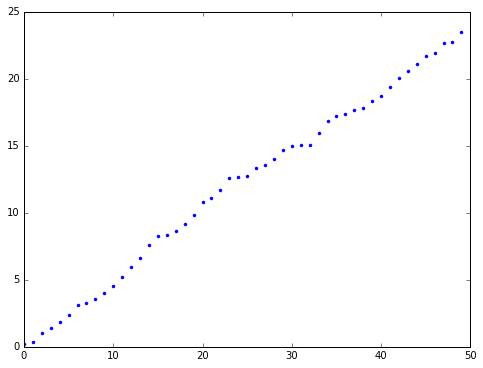

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)


from numpy import random
## 画出点图 累计cumsum()
ax.plot(random.rand(50).cumsum(),'.')#点图

In [7]:
tips[tips['sex']=='Male'].head()

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


### 可视化分析-使用点图

![](http://p1.bqimg.com/567571/aa41b12e9d3b4214.png)

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-27/31228716.jpg)

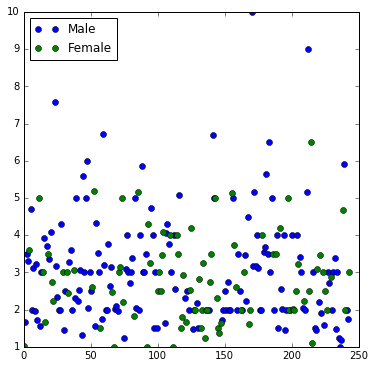

In [8]:
### 性别和小费是否有关 
## 有图可知 没有太多关系

## fig = plt.figure(figsize=(8,6))
## ax = fig.add_subplot(1,1,1)


fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.plot(tips[tips['sex']=='Male']['tip'],'o',label='Male')
ax.plot(tips[tips['sex']=='Female']['tip'],'o',label='Female')
ax.legend(loc='best')

In [9]:
ax.clear() #清除画布

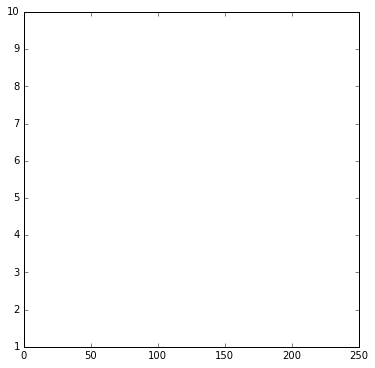

In [10]:
fig

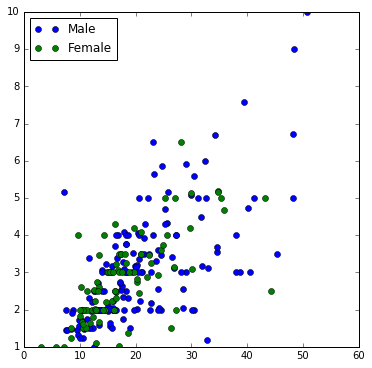

In [11]:
## 总的花费与小费 之间

ax.plot(tips[tips['sex']=='Male']['total_bill'],tips[tips['sex']=='Male']['tip'],'o',label='Male')
ax.plot(tips[tips['sex']=='Female']['total_bill'],tips[tips['sex']=='Female']['tip'],'o',label='Female')
ax.legend(loc='best')
fig

In [12]:
tips['tip_pct']=tips['tip']/tips['total_bill']

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa242227f90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa241c4a750>], dtype=object)

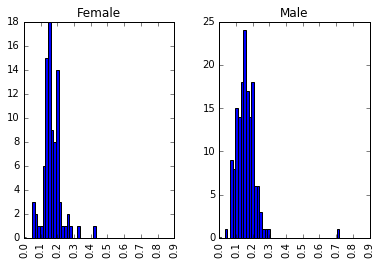

In [14]:
tips['tip_pct'].hist(by=tips['sex'],bins=50,range=[0,0.8])

![](http://p1.bpimg.com/567571/4aa4989f22835404.png)

![](http://p1.bpimg.com/567571/082d553d3b720772.png)

In [15]:
rvs1=tips[tips['sex']=='Male']['tip_pct']
rvs2=tips[tips['sex']=='Female']['tip_pct']

{'boxes': [<matplotlib.lines.Line2D at 0x7fa2418bbed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa241849d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa24185f0d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa241854a50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa241901410>,
  <matplotlib.lines.Line2D at 0x7fa241868350>]}

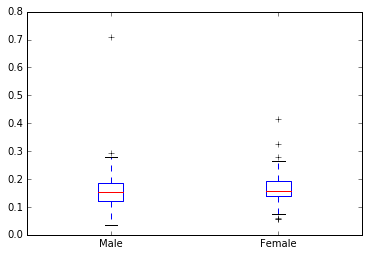

In [16]:
plt.boxplot([rvs1,rvs2],labels=['Male','Female'])

## 更严格的分析方式--假设检验

![](http://p1.bpimg.com/567571/a2501ba87b64b305.png)

## 类别型 ~ 类别型

In [17]:
### 星期几与是否抽烟有关么?

## 列联表crosstab

count=pd.crosstab(tips.smoker, tips.day)
count

day,Fri,Sat,Sun,Thur
smoker,,,,
No,4,45,57,45
Yes,15,42,19,17


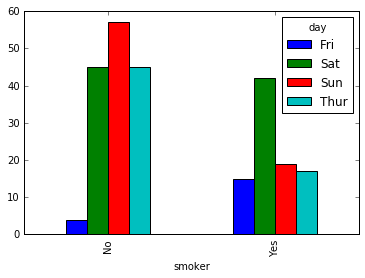

In [18]:
count.plot(kind='bar')# 直方图

In [19]:
count.T

smoker,No,Yes
day,,
Fri,4,15
Sat,45,42
Sun,57,19
Thur,45,17


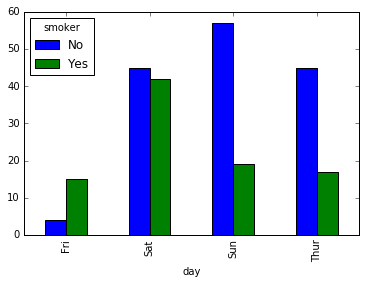

In [20]:
count.T.plot(kind='bar')

### 卡方检验

from scipy import  stats

表格中数值大于5

In [21]:
stats.chi2_contingency(count,correction=False) ## correction 修正/惩罚

(25.787216672396262,
 1.0567572499836523e-05,
 3,
 array([[ 11.75819672,  53.84016393,  47.03278689,  38.36885246],
        [  7.24180328,  33.15983607,  28.96721311,  23.63114754]]))

In [22]:
 #自由度dof
chi2, p, dof, ex = stats.chi2_contingency(count,correction=False)

In [23]:
p ##p值很小 所以两者之间没有关系

1.0567572499836523e-05

In [24]:
## 为什么是卡方检验

In [25]:
count#实际值

day,Fri,Sat,Sun,Thur
smoker,,,,
No,4,45,57,45
Yes,15,42,19,17


In [26]:
ex##卡方理论分布值

array([[ 11.75819672,  53.84016393,  47.03278689,  38.36885246],
       [  7.24180328,  33.15983607,  28.96721311,  23.63114754]])

![](http://p1.bpimg.com/567571/cb342e89a0d6c82f.png)
A为实际数，以上列联表就是实际数。T为理论数
![](http://p1.bpimg.com/567571/fca3adb8d641623f.png)

In [27]:
dof# 自由度

3

## 类别型~类别型

(如果样本较小)

费舍尔精确检验(2*2)

In [28]:
count = pd.crosstab(tips.sex,tips.smoker)

In [29]:
## 原假设 两者之间没有关系 
count

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [30]:
stats.fisher_exact(count)

(1.0121836925960637, 1.0)

In [31]:
oddsratio, pvalue = stats.fisher_exact(count)

In [32]:
oddsratio

1.0121836925960637

In [33]:
pvalue 
# p>0.05不能拒绝原假设
# 即接受原假设 两者之间没有关系


1.0

In [34]:
count

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [35]:
count.iat[0,0]=30

In [36]:
count

smoker,No,Yes
sex,,
Female,30,33
Male,97,60


In [37]:
stats.fisher_exact(count)

(0.5623242736644799, 0.069812038031474608)

## 数值型与数值型
![](http://p1.bpimg.com/567571/e9280e8331b9c493.png)

In [38]:
### Pearson相关系数

## stats.pearsonr

stats.pearsonr(tips.total_bill,tips.tip)

## (0.67573410921136434, 6.6924706468640407e-34) 
## 相关系数 :线性相关度, p-值:显著程度

(0.67573410921136434, 6.6924706468640407e-34)

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/77622162.jpg)

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/22939269.jpg)
![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/15717422.jpg)

In [39]:
np.random.seed(1234321)
x = np.random.randn(100)
y = np.random.randn(100)
rho, pval = stats.spearmanr(x, y)

In [40]:
rho, pval

(0.061326132613261322, 0.54443372627355135)

![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/25584094.jpg)

---
![](http://7xrw7v.com1.z0.glb.clouddn.com/16-8-28/66911418.jpg)

## 数值型~类别型

男女性别中给小费的费率 是否不同?

费率~性别

### t检验

In [41]:
# 原假设 两组之间没有关系
rvs1 = tips[tips['sex']=='Male']['tip']

rvs2 = tips[tips['sex']=='Female']['tip']

In [42]:
stats.ttest_ind(rvs1,rvs2)

# p>0.05不能拒绝原假设

Ttest_indResult(statistic=1.3878597054212687, pvalue=0.16645623503456763)

In [43]:
##  关联样本 stats.ttest_rel (同组重复抽样)

### 方差分析

![](http://p1.bqimg.com/567571/0f177b5083266648.png)

![](http://p1.bqimg.com/567571/ee642b022c1b44fd.png)

In [44]:
### 星期几对小费是否有影响 

tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [45]:
sun = tips[tips['day']=='Sun']['tip_pct']
sat = tips[tips['day']=='Sat']['tip_pct']
fri = tips[tips['day']=='Fri']['tip_pct']
thr = tips[tips['day']=='Thur']['tip_pct']

In [46]:
stats.f_oneway(sun,sat,fri,thr)

F_onewayResult(statistic=0.84800487891301235, pvalue=0.46884089923526473)

In [47]:
## 客人的数量与 小费 是有关的 
stats.spearmanr(tips['size'],tips['tip_pct'])

SpearmanrResult(correlation=-0.15216439029586909, pvalue=0.017381095227391195)

![](http://p1.bqimg.com/567571/2c5534a7504ea4ec.png)

### 若数据不满足上述条件 

![](http://p1.bqimg.com/567571/2af9e2281ab9db19.png)

![](http://p1.bpimg.com/567571/149c2f9a8a07ca47.png)